# About The Data:

Attributes Information:

- Age:Age of the patient [years]</font>

- Sex: Sex of the patient [M: Male, F: Female]</font>

- ChestPainType:Ch Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</font>

- RestingBP: Resting blood pressure [mm Hg]</font>

- Cholesterol: Serum cholesterol [mm/dl]</font>

- FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</font>

- RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</font>

- MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]</font>

- ExerciseAngina:Exercise-induced angina [Y: Yes, N: No]</font>

- Oldpeak: Oldpeak = ST [Numeric value measured in depression]</font>

- ST_Slope:The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</font>

- HeartDisease: Output class [1: heart disease, 0: Normal]</font>

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

C:\Users\muham\AppData\Local\Temp\ipykernel_15656\2398597206.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Collection

In [5]:
data = pd.read_csv("/content/heart.csv")

In [6]:
data.shape

(918, 12)

In [7]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [47]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Data Cleaning

In [10]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
df1 =data.select_dtypes(exclude=object)
df2 = data.select_dtypes(include=object)
df3= df1.drop('HeartDisease',axis=1)

In [13]:
df1.dtypes

Age               int64
RestingBP         int64
Cholesterol       int64
FastingBS         int64
MaxHR             int64
Oldpeak         float64
HeartDisease      int64
dtype: object

In [14]:
df2.dtypes

Sex               object
ChestPainType     object
RestingECG        object
ExerciseAngina    object
ST_Slope          object
dtype: object

In [15]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- in RestingBP column the Hypotension is abnormally low blood pressure (lower than 90/60 mm Hg). If your blood pressure gets too low, it can cause     dizziness, fainting or death.

- So I will delete the row contine 0 value



In [16]:
df1[df1['RestingBP']==0]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
449,55,0,0,0,155,1.5,1


In [17]:
df1.drop(index=df1[df1['RestingBP']==0].index,inplace=True)

# Processing Data

In [18]:
for i in range(0,df2.shape[1]):
    df2.iloc[:,i] = lab.fit_transform(df2.iloc[:,i])

<ipython-input-18-eb280cf6c917>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.iloc[:,i] = lab.fit_transform(df2.iloc[:,i])
<ipython-input-18-eb280cf6c917>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.iloc[:,i] = lab.fit_transform(df2.iloc[:,i])
<ipython-input-18-eb280cf6c917>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.is

In [19]:
df2.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [20]:
df = pd.concat([df1,df2],axis=1)

In [21]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,1,1,1,0,2
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,0,2,1,0,1
2,37.0,130.0,283.0,0.0,98.0,0.0,0.0,1,1,2,0,2
3,48.0,138.0,214.0,0.0,108.0,1.5,1.0,0,0,1,1,1
4,54.0,150.0,195.0,0.0,122.0,0.0,0.0,1,2,1,0,2


In [22]:
df.isna().sum()

Age               1
RestingBP         1
Cholesterol       1
FastingBS         1
MaxHR             1
Oldpeak           1
HeartDisease      1
Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64

In [23]:
df=df.dropna()

In [24]:
df.isna().sum()

Age               0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
Oldpeak           0
HeartDisease      0
Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64

# Analysis & Visualiation

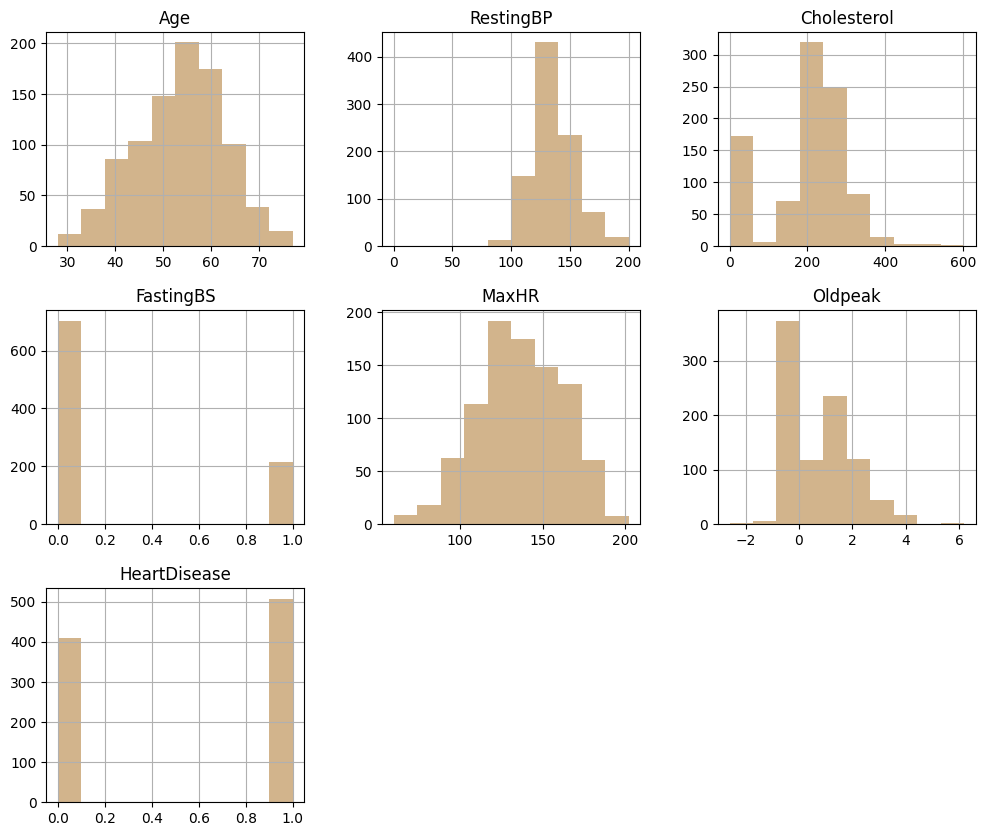

In [25]:
data.hist(figsize=(12,10),color='tan')
plt.show()

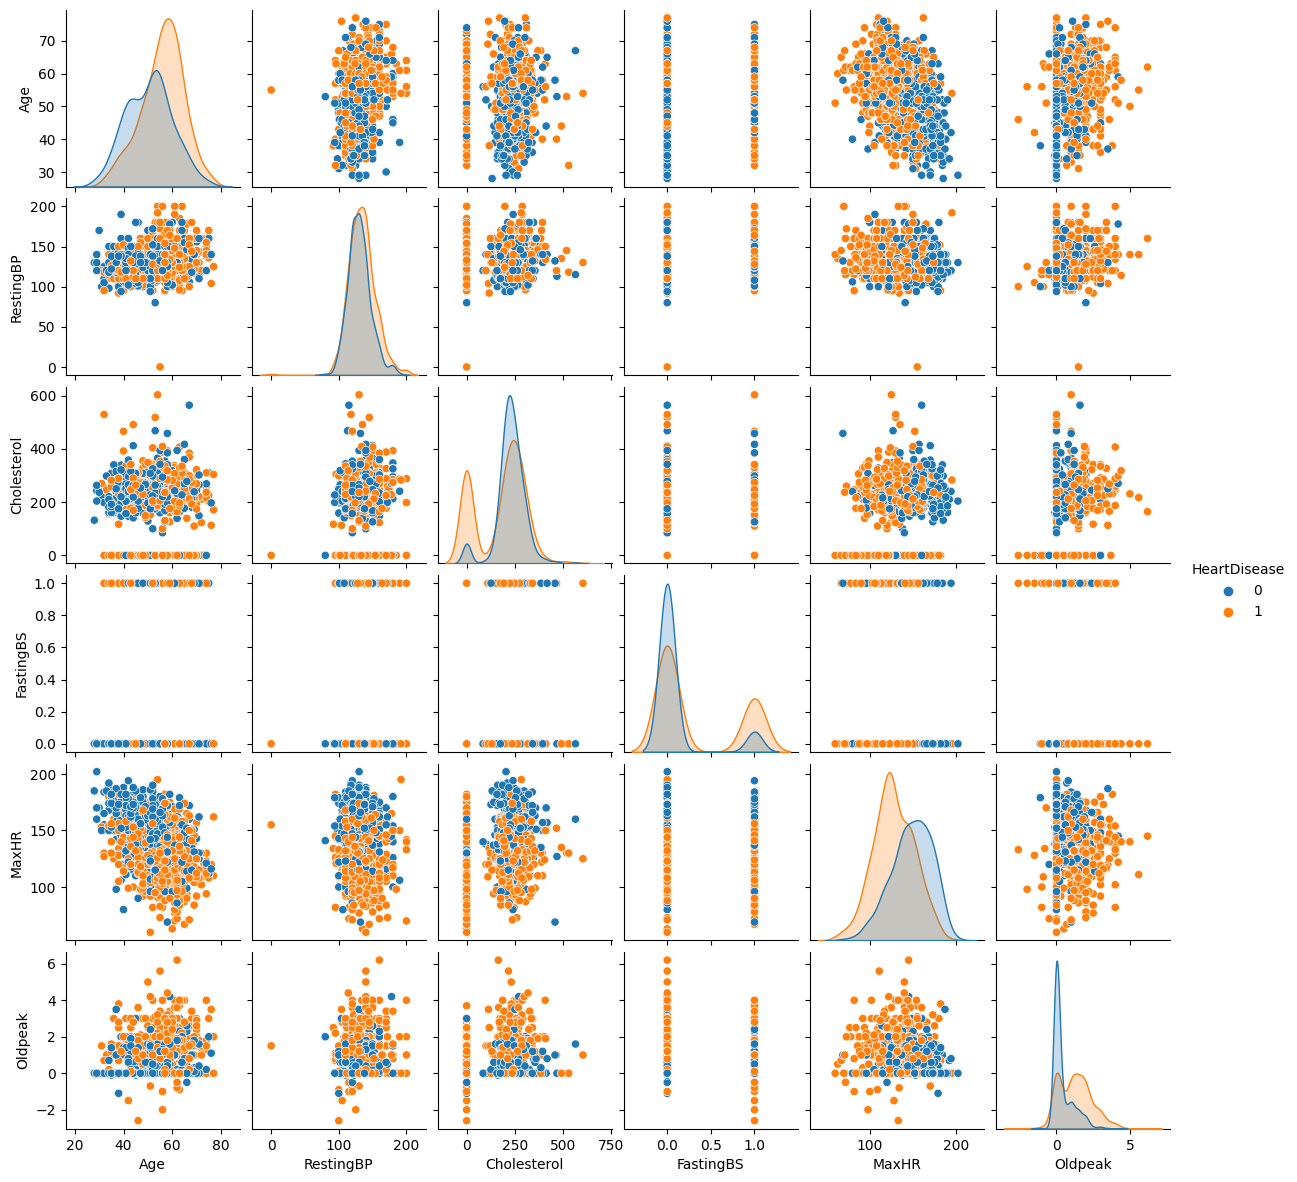

In [26]:
sns.pairplot(data,hue = 'HeartDisease', height = 2)

In [27]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
labels=['1','0']
count= data['HeartDisease'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(count,labels=labels,autopct='%.0f',explode=(0,.1), colors=['tan','navajowhite'])
plt.legend( ['heart disease','Normal'],loc =1)

plt.title('Heart Disease')
plt.show()

- This is a balanced dataset !, it's good

In [30]:
cor = df1.corr()

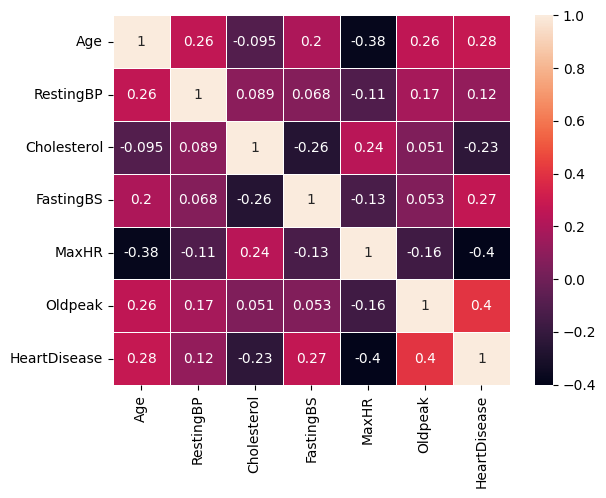

In [31]:
#plt.figure(figsize=(8,6))
sns.heatmap(cor, annot= True, linewidths= 0.5)
plt.show()

- No strong correlations between varaibles.

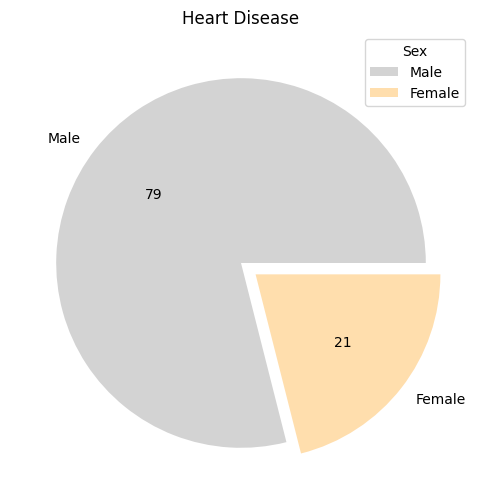

In [32]:
labels=['Male','Female']
count= df['Sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(count, labels=labels, autopct='%.0f', explode=(0,.1), colors=['lightgray','navajowhite'])
plt.legend( labels, title ="Sex", loc =1)

plt.title('Heart Disease')
plt.show()

- The number of males is greater than female

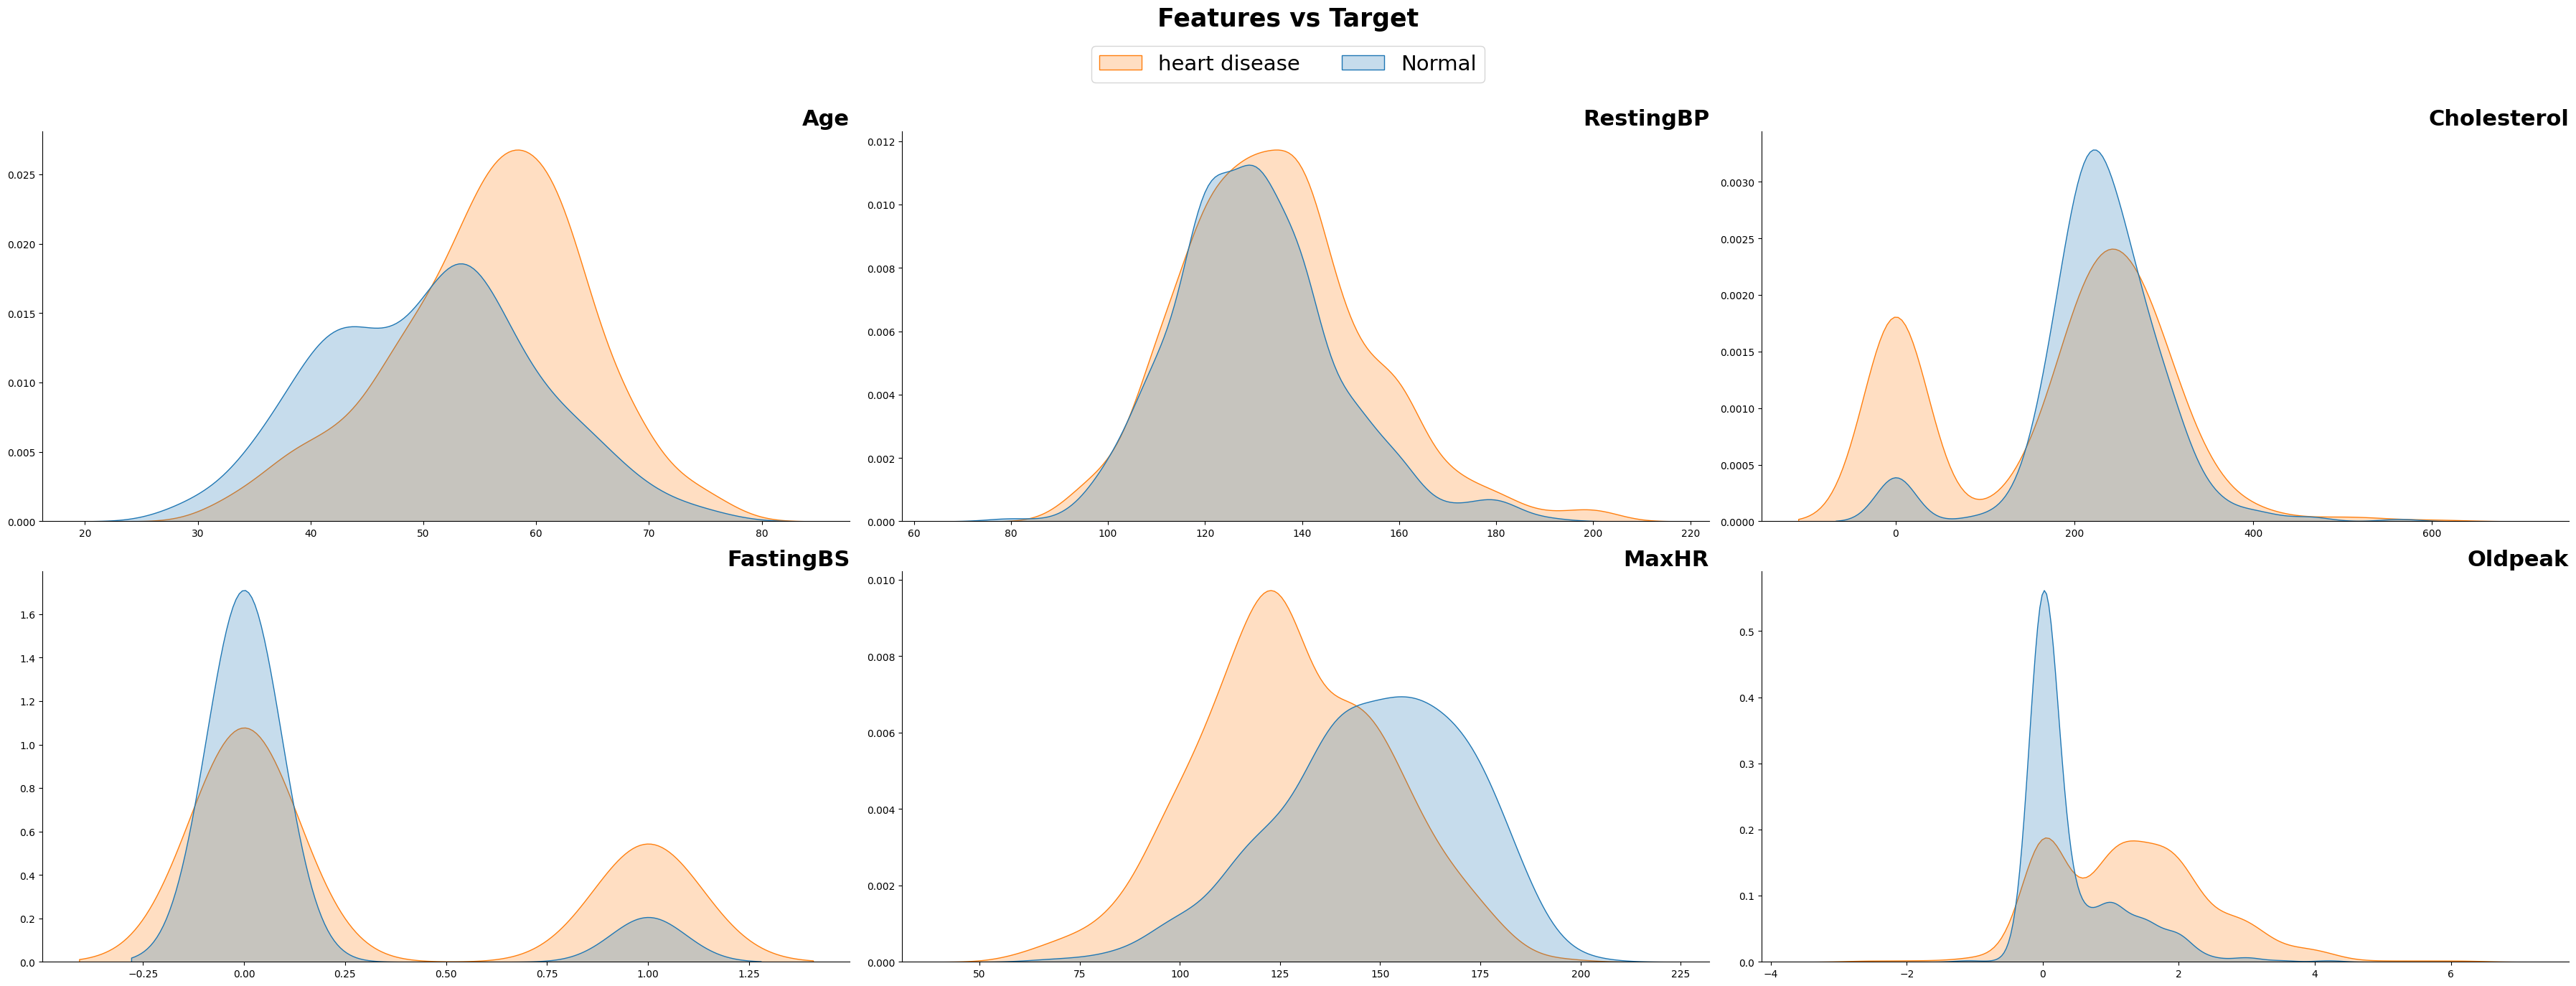

In [33]:
figsize = (6*6, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(df3[:-1]):
    ax = plt.subplot(3,3, idx + 1)
    sns.kdeplot(data=df, hue='HeartDisease', fill=True,x=col,  legend=False)

    ax.set_ylabel(''); ax.spines['top'].set_visible(False),
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right',weight='bold', fontsize=22)

fig.suptitle(f'Features vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(['heart disease','Normal'], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)
plt.tight_layout()
plt.show()

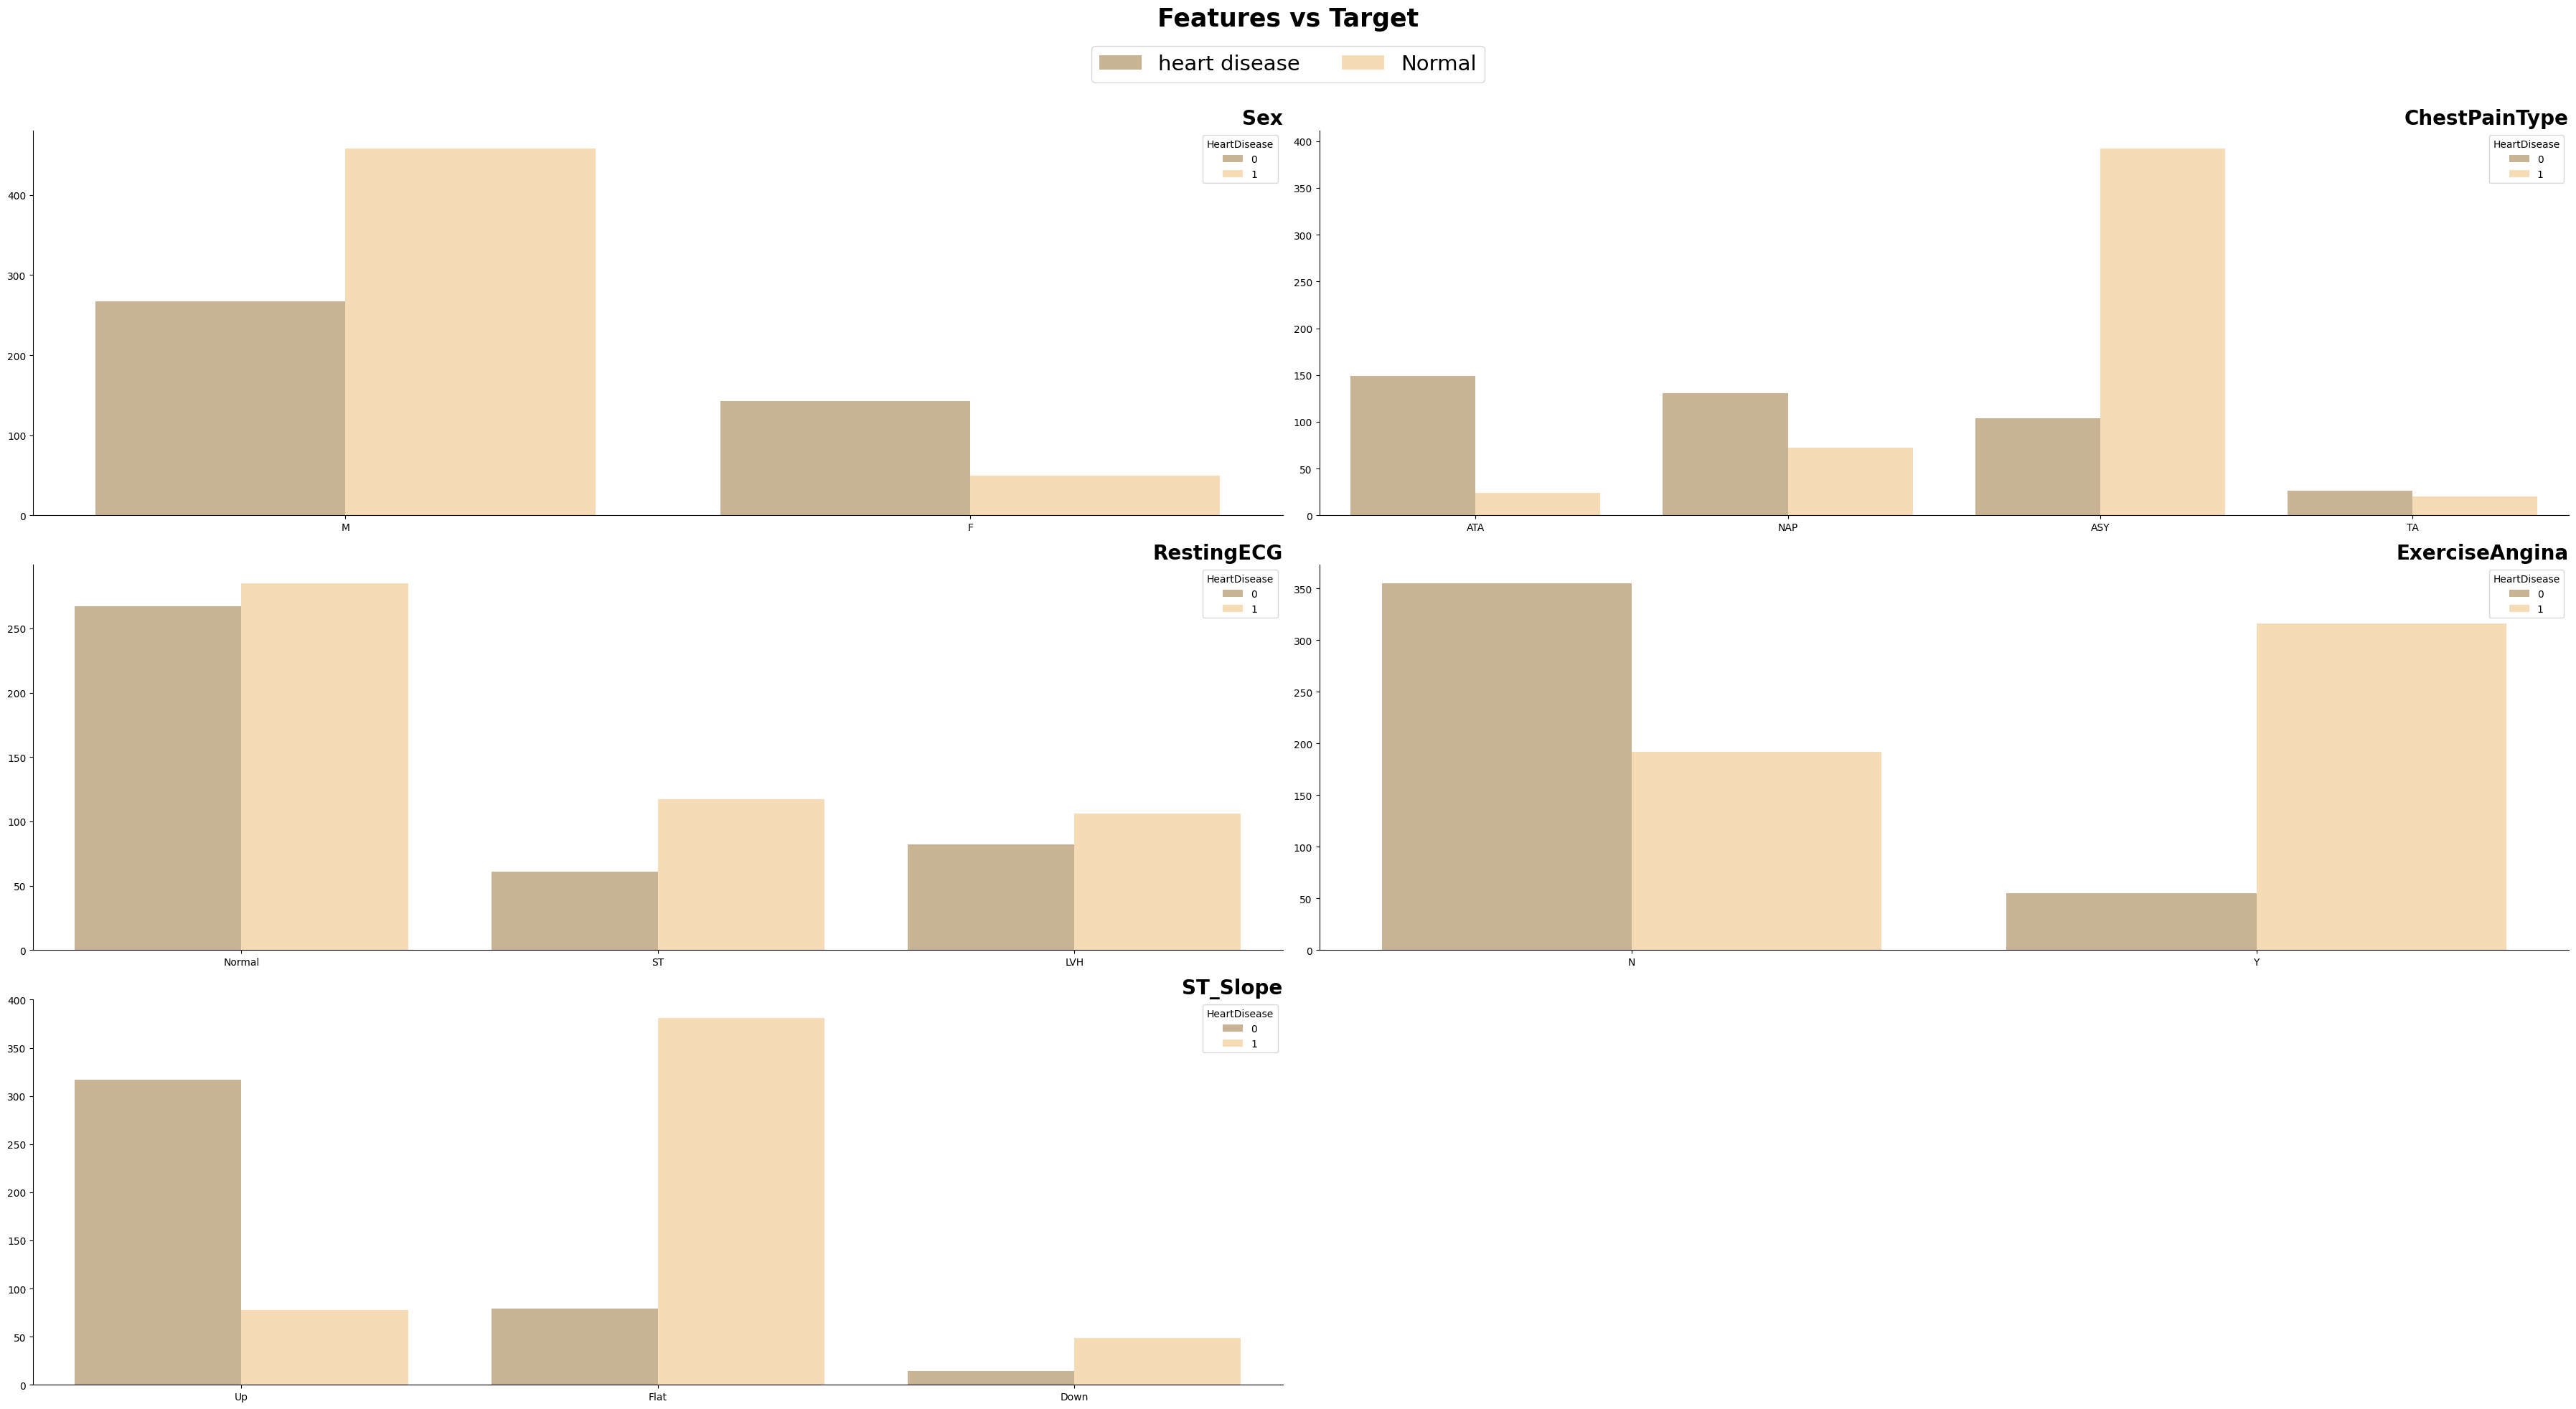

In [34]:

figsize = (6*6, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(df2[:-1]):
    ax = plt.subplot(3,2, idx + 1)
    sns.countplot(data=data, hue='HeartDisease', fill=True, x=col, palette=['tan','navajowhite'])

    ax.set_ylabel(''); ax.spines['top'].set_visible(False),
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right', weight='bold', fontsize=20)

fig.suptitle(f'Features vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(['heart disease','Normal'], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)
plt.tight_layout()
plt.show()

- In ChestPainType column: show that the patients who have AST are more likely to have heart disease
- In ExerclseAngina column: show that the patients who have exerclse angina are more likely to have heart disease
- In ST_Slope column: show that the patients who have flat are more likely to have heart disease

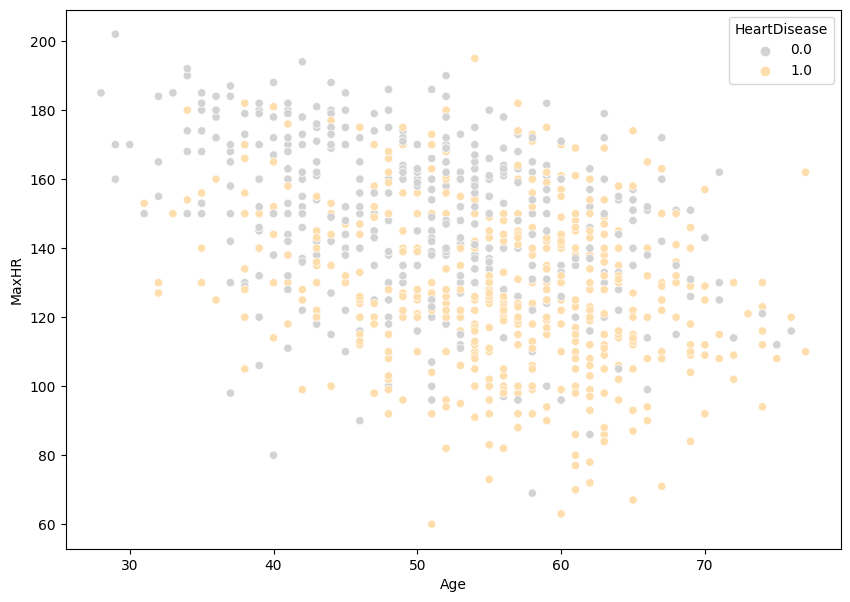

In [35]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Age',y='MaxHR',data=df,hue='HeartDisease',palette=['lightgray','navajowhite'])
plt.show()

- from This scatter plot, shows that when the patient is older, he will be lower in heart rate and more likely to have heart disease

# Model

In [36]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,1,1,1,0,2
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,0,2,1,0,1
2,37.0,130.0,283.0,0.0,98.0,0.0,0.0,1,1,2,0,2
3,48.0,138.0,214.0,0.0,108.0,1.5,1.0,0,0,1,1,1
4,54.0,150.0,195.0,0.0,122.0,0.0,0.0,1,2,1,0,2


In [37]:
x=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

In [38]:
x_trian, x_test, y_trian, y_test = train_test_split(x,y,train_size=.8,random_state=21)

In [39]:
def all(model):
    model.fit(x_trian,y_trian)
    pre = model.predict(x_test)

    #xmod_train = round(model.score(x_trian, y_trian) * 100, 2)
    #xmod_accuracy = round(accuracy_score(pre, y_test) * 100, 2)

    #print("Training Accuracy    :", xmod_train, "%")
    #print("Model Accuracy Score :", xmod_accuracy, "%")
    print(confusion_matrix(pre,y_test))
    print(classification_report(pre,y_test))


- KNN

In [40]:
model1 = KNeighborsClassifier()
all(model1)

[[57 31]
 [19 77]]
              precision    recall  f1-score   support

         0.0       0.75      0.65      0.70        88
         1.0       0.71      0.80      0.75        96

    accuracy                           0.73       184
   macro avg       0.73      0.72      0.73       184
weighted avg       0.73      0.73      0.73       184



- Decision Tree

In [41]:
model2 = DecisionTreeClassifier()
all(model2)

[[58 20]
 [18 88]]
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75        78
         1.0       0.81      0.83      0.82       106

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



- Naive_bayes

In [42]:
model3 = GaussianNB()
all(model3)

[[67 14]
 [ 9 94]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85        81
         1.0       0.87      0.91      0.89       103

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



- SVm

In [43]:
model4 = SVC()
all(model4)

[[53 34]
 [23 74]]
              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65        87
         1.0       0.69      0.76      0.72        97

    accuracy                           0.69       184
   macro avg       0.69      0.69      0.69       184
weighted avg       0.69      0.69      0.69       184



- RandomForest

In [44]:
model5 = RandomForestClassifier()
all(model5)

[[62 10]
 [14 98]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84        72
         1.0       0.91      0.88      0.89       112

    accuracy                           0.87       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.87      0.87       184



- GradientBoosting

In [45]:
model6 = GradientBoostingClassifier()
all(model6)

[[64 12]
 [12 96]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        76
         1.0       0.89      0.89      0.89       108

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



- The Best algorithm is GradientBoostingClassifier Algorithm

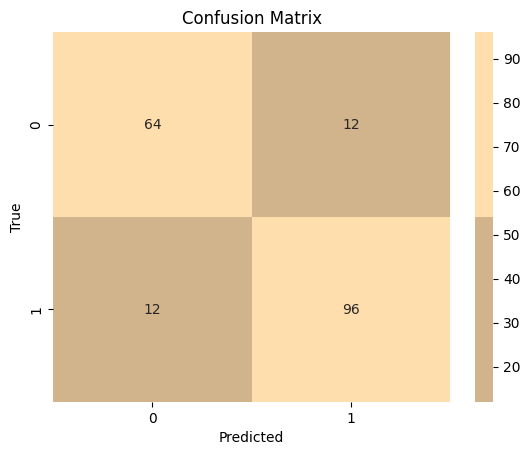

In [46]:
cm = confusion_matrix(y_test, model6.predict(x_test))

sns.heatmap(cm, annot=True, fmt='d', cmap=['tan','navajowhite'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()